# Análisis ETFs: renta fija_renta variable

Notebook soporte del artículo:https://estrategiastrading.com/analisis-de-etfs-con-python/

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']= 16,8
plt.style.use('seaborn-darkgrid')

In [2]:
# Cargar datos
start = pd.Timestamp ('2003-10-01')#ajusto fechas a 2003 para incluir AGG
end = pd.Timestamp ('2017-2-01')

symbols = ['SPY', 'TLT','DIA','AGG']
ETFs = pd.DataFrame()
for sym in symbols:
    ETFs[sym] = web.DataReader(sym,'yahoo' ,start,end)['Adj Close']   
    

In [3]:
ETFs.head()

,SPY,TLT,DIA,AGG
Date,,,,
2003-10-01,78.113299,53.344913,68.917696,64.712984
2003-10-02,78.396425,53.101110,69.193923,64.612114
2003-10-03,79.115730,51.985693,69.724559,64.145602
2003-10-06,79.475383,52.211216,69.928091,64.240166
2003-10-07,79.781471,51.607791,70.284278,64.019519


## Gráficos

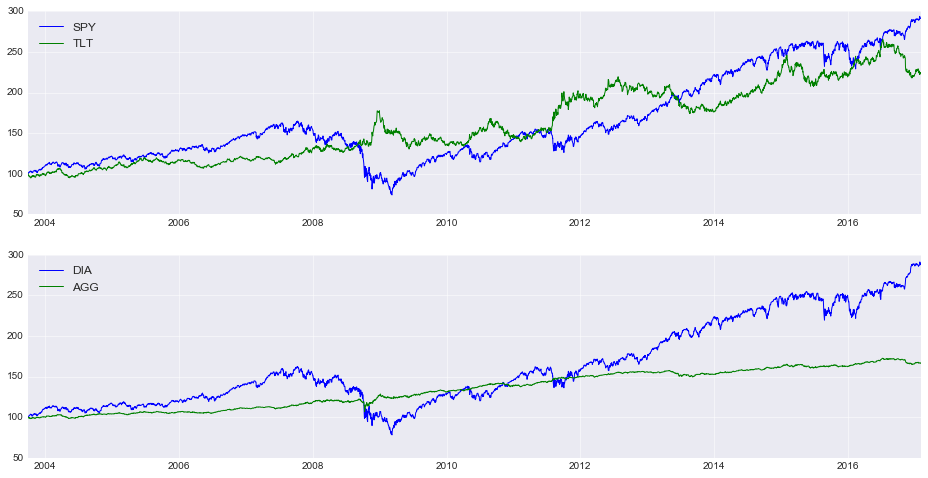

In [5]:
#Grafico normalizando el valor inicial en 100

fig, axes = plt.subplots(nrows=2, ncols = 1)
axes[0].plot(ETFs.SPY / ETFs.SPY.ix[0] * 100)
axes[0].plot(ETFs.TLT / ETFs.TLT.ix[0] * 100)
axes[0].legend(loc= 'best')

axes[1].plot(ETFs.DIA / ETFs.DIA.ix[0] * 100)
axes[1].plot(ETFs.AGG / ETFs.AGG.ix[0] * 100)
axes[1].legend(loc= 'best');

Lo primero que vemos es que DIA y SPY evolucionan de manera similar.Por el contrario TLT y AGG no parecen moverse con la misma volatilidad.

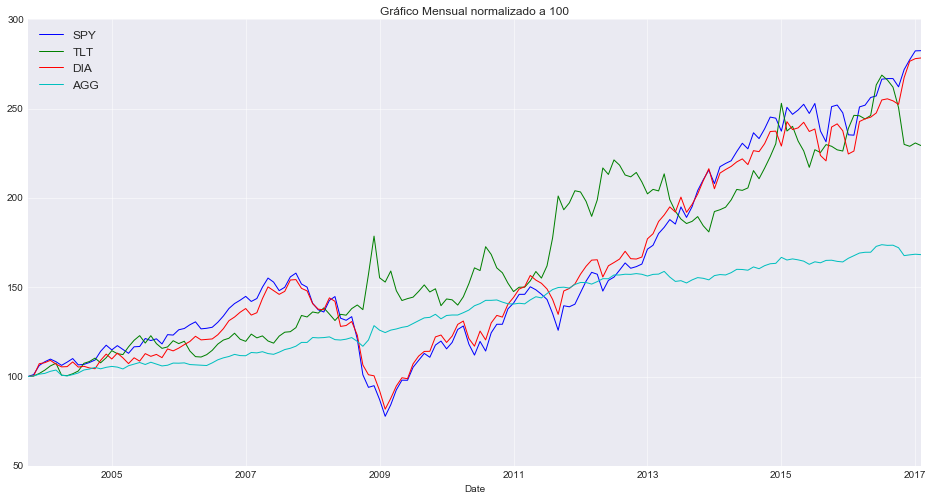

In [6]:
# Cambio a mensual
ETFxMes = ETFs.resample ('BM').last()
#grafico normalizado
ax= (ETFxMes / ETFxMes.ix[0] * 100).plot()
plt.title ('Gráfico Mensual normalizado a 100');

## Rendimientos mensuales

In [7]:
log_returns = np.log(ETFxMes) - np.log(ETFxMes.shift(1))
log_returns = log_returns.dropna()
log_returns.describe()

,SPY,TLT,DIA,AGG
count,160.000000,160.000000,160.000000,160.000000
mean,0.006490,0.005189,0.006399,0.003252
std,0.039900,0.037747,0.037704,0.010781
min,-0.180547,-0.140076,-0.145760,-0.028466
25%,-0.014101,-0.018805,-0.014104,-0.002288
50%,0.012156,0.006749,0.008371,0.003086
75%,0.030796,0.026203,0.029513,0.010038
max,0.103591,0.134018,0.092876,0.064499


In [8]:
RPos = (log_returns >= 0). sum()# cuantos retornos son mayores a 0
RPos

SPY    105
TLT     87
DIA    103
AGG    100
dtype: int64

In [9]:
RNeg = (log_returns < 0). sum()# Cuantos meses son negativos
RNeg

SPY    55
TLT    73
DIA    57
AGG    60
dtype: int64

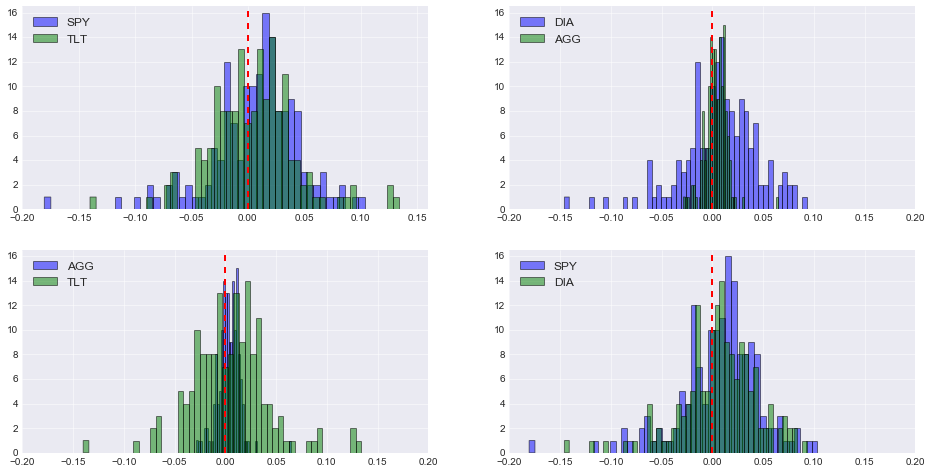

In [10]:
fig = plt.figure()

img1= fig.add_subplot(221)
log_returns.SPY.hist(bins=50,alpha=0.5, label = 'SPY')
log_returns.TLT.hist(bins=50, alpha=0.5, label = 'TLT')
plt.legend(loc='upper left')
plt.ylim([0, 16.5])
plt.xlim([-0.20, 0.16])
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2)

img2=fig.add_subplot(222)
log_returns.DIA.hist(bins=50,alpha=0.5, label = 'DIA')
log_returns.AGG.hist(bins=50, alpha=0.5, label = 'AGG')
plt.legend(loc='upper left')
plt.ylim([0, 16.5])
plt.xlim([-0.20, 0.20])
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2);

img3=fig.add_subplot(223)
log_returns.AGG.hist(bins=50,alpha=0.5, label = 'AGG')
log_returns.TLT.hist(bins=50, alpha=0.5, label = 'TLT')
plt.legend(loc='upper left')
plt.ylim([0, 16.5])
plt.xlim([-0.20, 0.20])
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2);

img4=fig.add_subplot(224)
log_returns.SPY.hist(bins=50,alpha=0.5, label = 'SPY')
log_returns.DIA.hist(bins=50, alpha=0.5, label = 'DIA')
plt.legend(loc='upper left')
plt.ylim([0, 16.5])
plt.xlim([-0.20, 0.20])
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2);

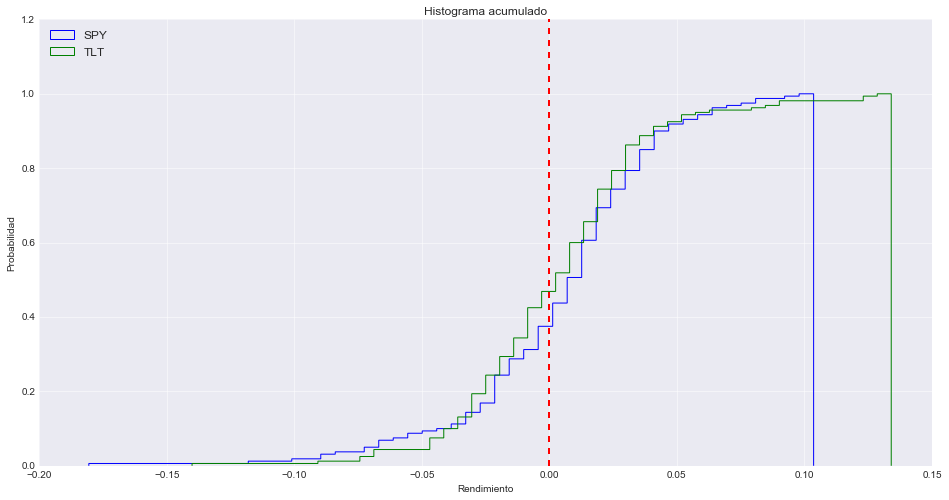

In [11]:
fig, ax = plt.subplots()
ax.hist(log_returns.SPY, bins=50,histtype='step', cumulative= 1, normed=1,label= 'SPY')
ax.hist(log_returns.TLT, bins=50, histtype='step', cumulative= 1,normed=1, label= 'TLT')
ax.set_title('Histograma acumulado')
ax.set_xlabel('Rendimiento')
ax.set_ylabel('Probabilidad')
plt.legend(loc='upper left')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2);

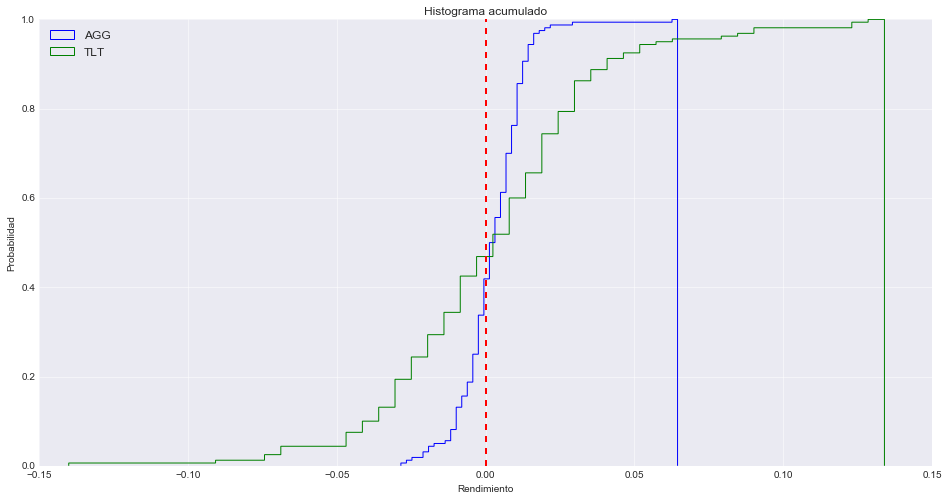

In [12]:
fig, ax = plt.subplots()
ax.hist(log_returns.AGG, bins=50,histtype='step', cumulative= 1, normed=1,label= 'AGG')
ax.hist(log_returns.TLT, bins=50, histtype='step', cumulative= 1,normed=1, label= 'TLT')
ax.set_title('Histograma acumulado')
ax.set_xlabel('Rendimiento')
ax.set_ylabel('Probabilidad')
plt.legend(loc='upper left')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2);

## Comparativa rendimientos logaritmicos con una distribución normal

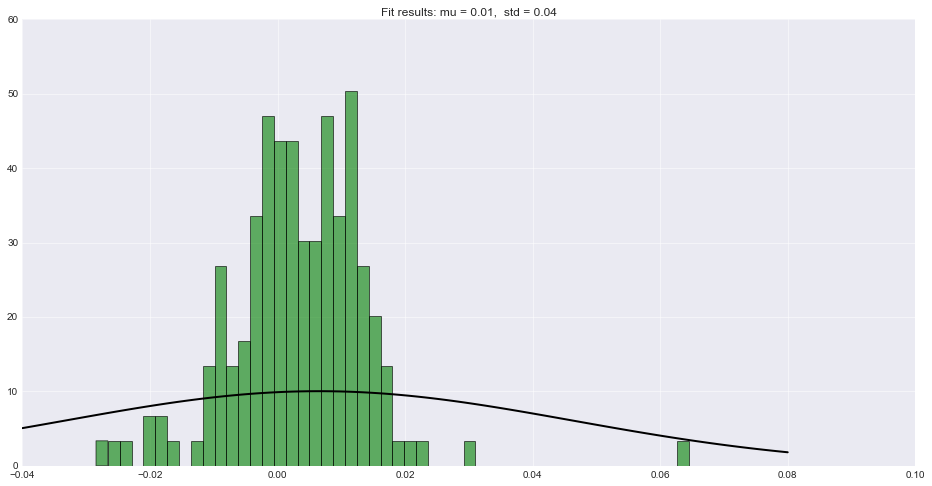

In [13]:
from scipy.stats import norm

plt.hist(log_returns.AGG, bins=50, normed=True, alpha=0.6, color='g')
#PDF.
mu, std = norm.fit(log_returns.SPY)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title);

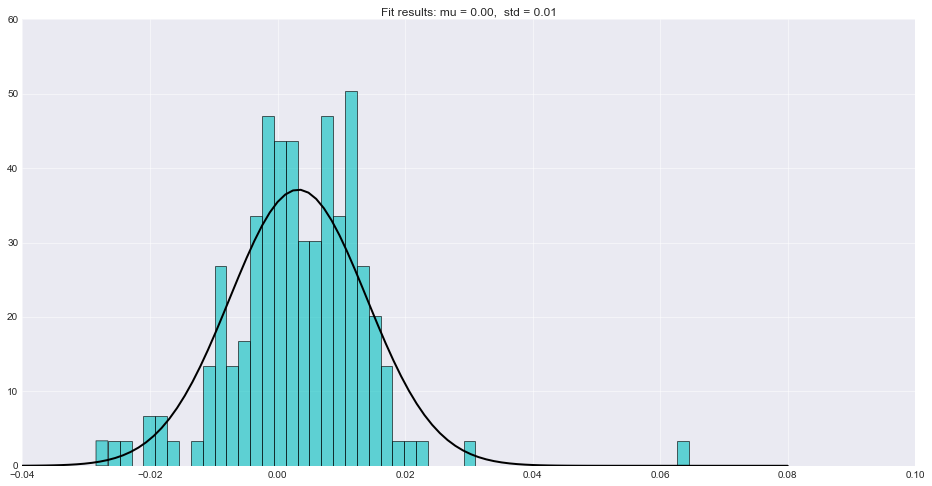

In [14]:
#Ahora con TLT

plt.hist(log_returns.AGG, bins=50, normed=True, alpha=0.6, color='c')
#PDF.
mu, std = norm.fit(log_returns.AGG)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title);

# Correlaciones

In [15]:
log_returns.corr()

,SPY,TLT,DIA,AGG
SPY,1.000000,-0.282902,0.968369,0.056563
TLT,-0.282902,1.000000,-0.284622,0.790843
DIA,0.968369,-0.284622,1.000000,0.028547
AGG,0.056563,0.790843,0.028547,1.000000


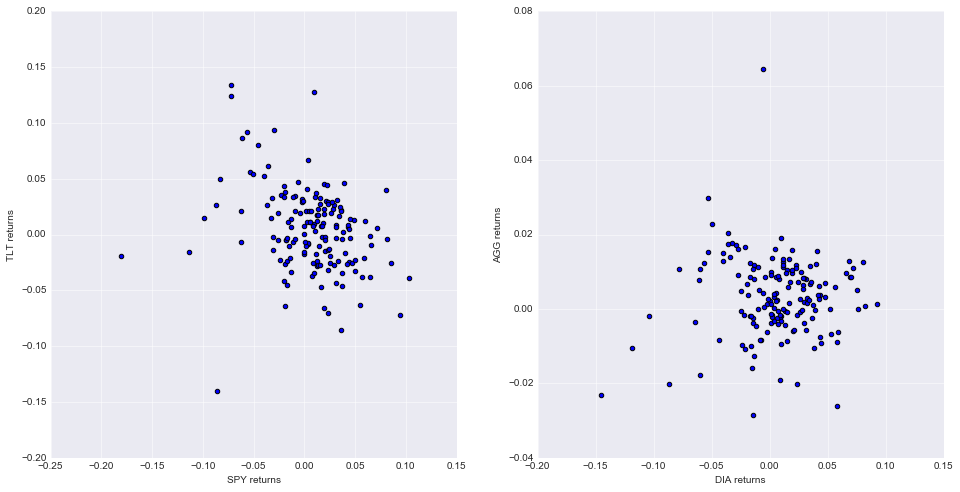

In [16]:

fig = plt.figure()

img1= fig.add_subplot(121)
plt.scatter(log_returns['SPY'],log_returns['TLT'])
plt.xlabel('SPY returns')
plt.ylabel('TLT returns');


img2= fig.add_subplot(122)
plt.scatter(log_returns['DIA'],log_returns['AGG'])
plt.xlabel('DIA returns')
plt.ylabel('AGG returns');

## Rolling correlation

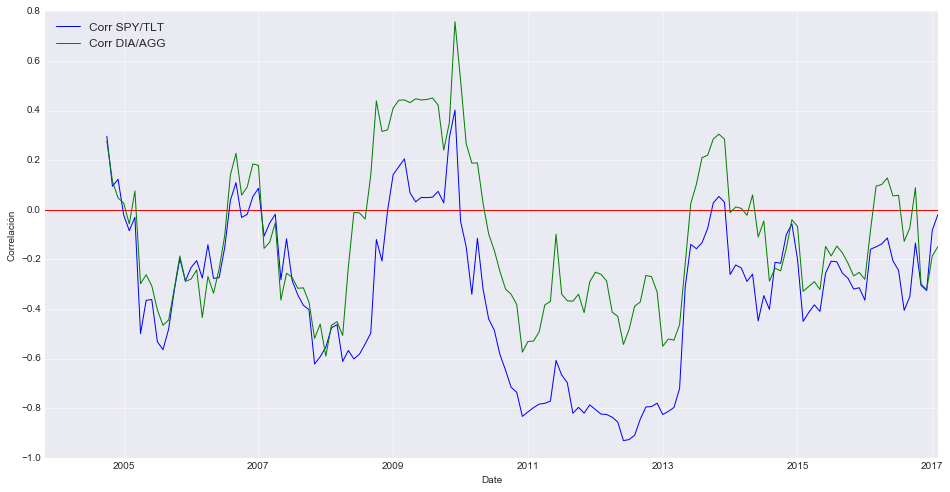

In [17]:
log_returns.SPY.rolling(12).corr(log_returns.TLT).plot()
log_returns.DIA.rolling(12).corr(log_returns.AGG).plot()
plt.hlines(0,start,end, color= 'r')
plt.ylabel('Correlación')
plt.legend(('Corr SPY/TLT', 'Corr DIA/AGG'), loc='upper left');

### ¿Cuántos meses se da cada tipo de situación?

In [18]:
print('Nº meses TLT >= 0 y SPY >= 0 es igual a ' + str (len(log_returns[(log_returns.TLT >= 0) & (log_returns.SPY >= 0)])))
print('Nº meses TLT < 0 y SPY < 0 es igual a ' + str (len(log_returns[(log_returns.TLT < 0) & (log_returns.SPY < 0)])))
print('Nº meses TLT >= 0 y SPY < 0 es igual a ' + str (len(log_returns[(log_returns.TLT >= 0) & (log_returns.SPY < 0)])))
print('Nº meses TLT < 0 y SPY >= 0 es igual a ' + str (len(log_returns[(log_returns.TLT < 0) & (log_returns.SPY >= 0)])))

Nº meses TLT >= 0 y SPY >= 0 es igual a 53
Nº meses TLT < 0 y SPY < 0 es igual a 21
Nº meses TLT >= 0 y SPY < 0 es igual a 34
Nº meses TLT < 0 y SPY >= 0 es igual a 52


In [19]:
print('Nº meses AGG >= 0 y DIA >= 0 es igual a ' + str (len(log_returns[(log_returns.AGG >= 0) & (log_returns.DIA >= 0)])))
print('Nº meses AGG < 0 y DIA < 0 es igual a ' + str (len(log_returns[(log_returns.AGG < 0) & (log_returns.DIA < 0)])))
print('Nº meses AGG >= 0 y DIA < 0 es igual a ' + str (len(log_returns[(log_returns.AGG >= 0) & (log_returns.DIA < 0)])))
print('Nº meses AGG < 0 y DIA >= 0 es igual a ' + str (len(log_returns[(log_returns.AGG < 0) & (log_returns.DIA >= 0)])))

Nº meses AGG >= 0 y DIA >= 0 es igual a 67
Nº meses AGG < 0 y DIA < 0 es igual a 24
Nº meses AGG >= 0 y DIA < 0 es igual a 33
Nº meses AGG < 0 y DIA >= 0 es igual a 36


### ¿Cómo se comporta una serie cuando la otra gana o pierde dinero?

In [20]:
AGGcuandoDIANegativo = log_returns[log_returns.DIA < 0 ]
AGGcuandoDIAPositivo = log_returns[log_returns.DIA >= 0 ]

DIAcuandoAGGNegativo = log_returns[log_returns.AGG < 0 ]
DIAcuandoAGGPositivo = log_returns[log_returns.AGG >= 0 ]


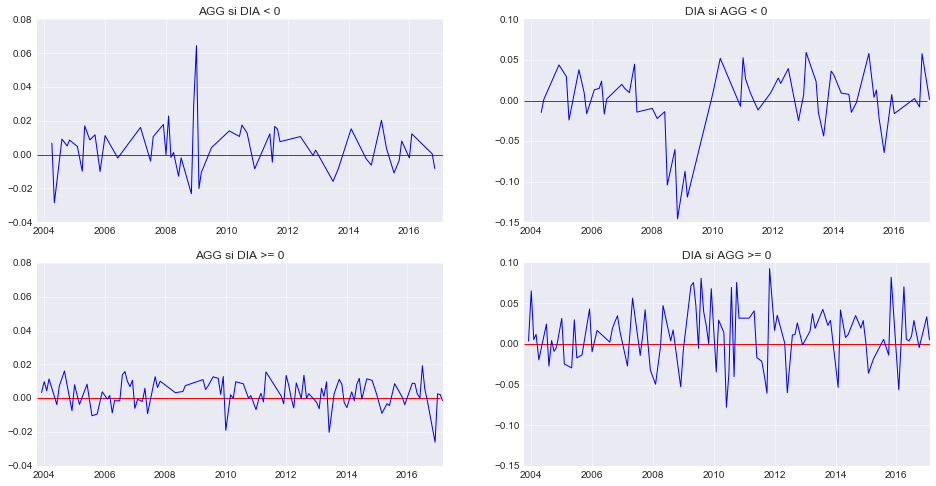

In [21]:
#Plots
fig, axes = plt.subplots(nrows=2, ncols = 2,sharey='col')


axes[0,0].plot(AGGcuandoDIANegativo.AGG)
axes[0,0].hlines(0,start,end, color= 'r')
axes[0,0].set_title('AGG si DIA < 0')


axes[1,0].plot(AGGcuandoDIAPositivo.AGG)
axes[1,0].set_title('AGG si DIA >= 0')
axes[1,0].hlines(0,start,end, color= 'r')

axes[0,1].plot(DIAcuandoAGGNegativo.DIA)
axes[0,1].hlines(0,start,end, color= 'r')
axes[0,1].set_title('DIA si AGG < 0')

axes[1,1].plot(DIAcuandoAGGPositivo.DIA)
axes[1,1].set_title('DIA si AGG >= 0')
axes[1,1].hlines(0,start,end, color= 'r');


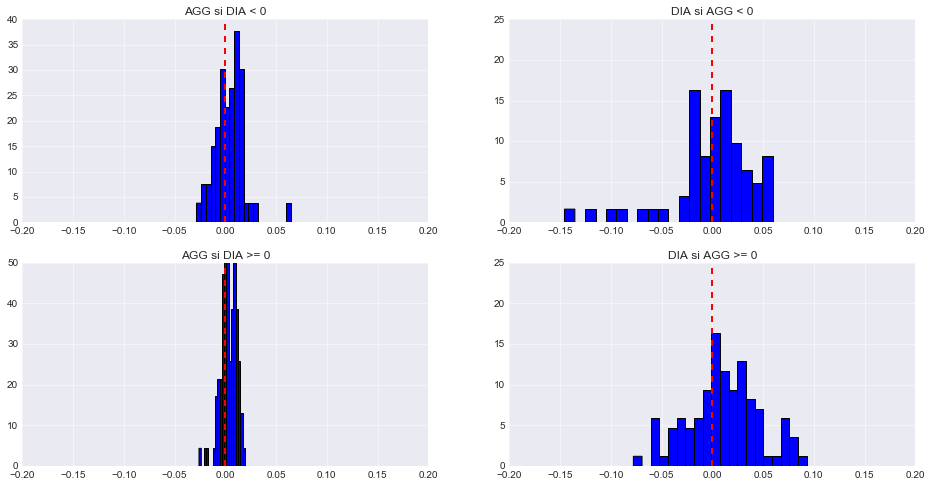

In [22]:
#Formato histograma
fig = plt.figure()


img1= fig.add_subplot(221)
plt.hist(AGGcuandoDIANegativo.AGG, bins=20, normed=True)
plt.title('AGG si DIA < 0')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2)
plt.ylim([0, 40])
plt.xlim([-0.20, 0.20])


img2 = fig.add_subplot(223)
plt.hist(AGGcuandoDIAPositivo.AGG, bins=20, normed=True)
plt.title('AGG si DIA >= 0')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2)
plt.ylim([0, 50])
plt.xlim([-0.20, 0.20])

img3= fig.add_subplot(222)
plt.hist(DIAcuandoAGGNegativo.DIA, bins=20, normed=True)
plt.title('DIA si AGG < 0')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2)
plt.ylim([0, 25])
plt.xlim([-0.20, 0.20])

img4 = fig.add_subplot(224)
plt.hist(DIAcuandoAGGPositivo.DIA, bins=20, normed=True)
plt.title('DIA si AGG >= 0')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2)
plt.ylim([0, 25])
plt.xlim([-0.20, 0.20]);


### ¿Cuánto gana uno cuando el otro pierde?

In [23]:
(log_returns.AGG[(log_returns.AGG >=0) & (log_returns.DIA < 0)]).describe()
#sabemos que Nº meses AGG >= 0 y DIA < 0 es igual a 33

count    33.000000
mean      0.013075
std       0.011227
min       0.000516
25%       0.007676
50%       0.011278
75%       0.016123
max       0.064499
Name: AGG, dtype: float64

In [24]:
(log_returns[(log_returns.AGG >=0) &(log_returns.DIA < 0)]).sum()

SPY   -0.894109
TLT    1.472168
DIA   -0.912471
AGG    0.431484
dtype: float64

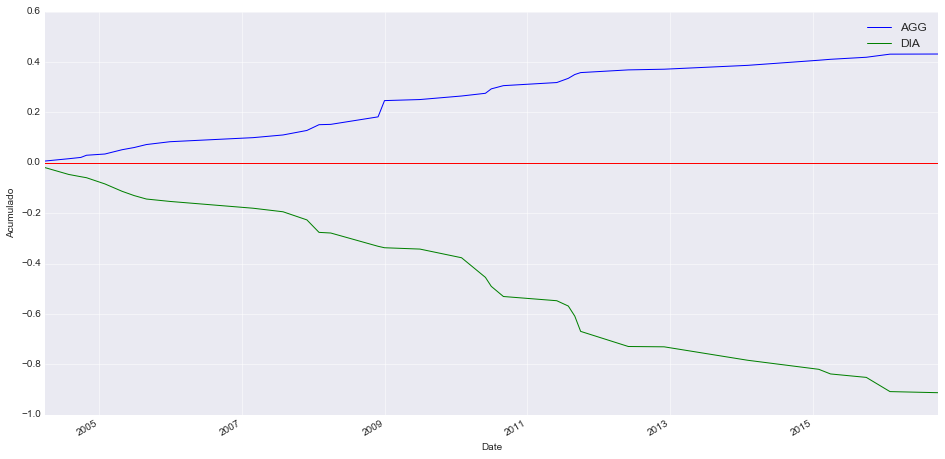

In [25]:
Bonossibolsapierde=((log_returns[(log_returns.AGG >= 0) & (log_returns.DIA < 0)])).cumsum()
Bonossibolsapierde.AGG.plot()
Bonossibolsapierde.DIA.plot()
plt.hlines(0,start,end, color= 'r')
plt.ylabel('Acumulado')
plt.legend();

AGG no llega a compensar las pérdidas de DIA

### ¿Y DIA cuando AGG pierde?

In [26]:
(log_returns.DIA[(log_returns.DIA >=0) & (log_returns.AGG < 0)]).describe()

count    36.000000
mean      0.023094
std       0.018180
min       0.001322
25%       0.008913
50%       0.017584
75%       0.036674
max       0.059302
Name: DIA, dtype: float64

In [27]:
(log_returns[(log_returns.DIA >=0) &(log_returns.AGG < 0)]).sum()

SPY    0.815161
TLT   -0.891145
DIA    0.831371
AGG   -0.192467
dtype: float64

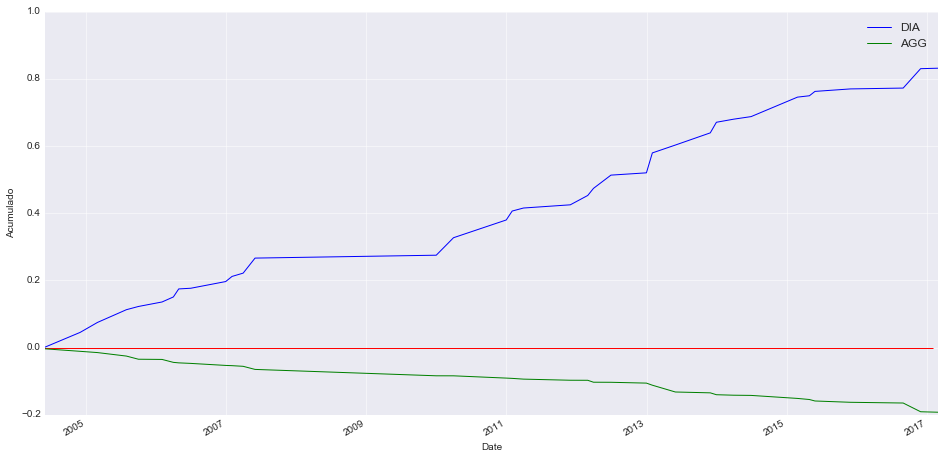

In [28]:
Bolsasibonospierde=((log_returns[(log_returns.DIA >= 0) & (log_returns.AGG < 0)])).cumsum()
Bolsasibonospierde.DIA.plot()
Bolsasibonospierde.AGG.plot()
plt.hlines(0,start,end, color= 'r')
plt.ylabel('Acumulado')
plt.legend();

AGG no llega a tener la misma volatilidad que en el test anterior con TLT, entonces no llega a compensar las posibles pérdidas de DIA ( si trabajamos ambos con el mismo peso sin ponderar por volatilidad). Además la correlación no es negativa entre DIA y AGG.